<h1>Imports</h1>

In [2]:
import numpy as np
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import keras
keras.__version__

'3.0.4'

In [4]:
%matplotlib inline

In [1]:
import cv2

In [5]:
# adds a progressbar
from tqdm.notebook import tqdm

# set seaborn graphs to a better style
sns.set(style="ticks")

In [6]:
import os, sklearn


<h1>Loading data</h1>

In [7]:
data_path = r"C:\Users\tisha\Documents\GitHub\adv_python_project\face_age"

In [8]:
images = []
labels = []

In [9]:
for age_folder in os.listdir(data_path):
    age_path = os.path.join(data_path, age_folder)
    if os.path.isdir(age_path):
        for img_name in os.listdir(age_path):
            img_path = os.path.join(age_path, img_name)
            # Read the image
            img = cv2.imread(img_path)
            if img is not None:
                # Resize the image to a fixed size (e.g., 64x64)
                img = cv2.resize(img, (200, 200))
                images.append(img)
                labels.append(int(age_folder))

images = np.array(images)
labels = np.array(labels)

<h1>Processing data</h1>

In [10]:
images = images / 255.0

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=42)

# Verify the shapes of the split datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (8311, 64, 64, 3)
X_test shape: (1467, 64, 64, 3)
y_train shape: (8311,)
y_test shape: (1467,)


<h1>Creating model</h1>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [33]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='swish', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='swish'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='swish'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation='swish'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                  │ (None, 62, 62, 32)            │         896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_9 (MaxPooling2D)     │ (None, 31, 31, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_12 (Dropout)               │ (None, 31, 31, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_10 (Conv2D)                 │ (None, 29, 29, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_10 (MaxPooling2D)    │ (None, 14, 14, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_13 (Dropout)               │ (None, 14, 14, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_11 (Conv2D)                 │ (None, 12, 12, 128)           │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_11 (MaxPooling2D)    │ (None, 6, 6, 128)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_14 (Dropout)               │ (None, 6, 6, 128)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_3 (Flatten)                │ (None, 4608)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_6 (Dense)                    │ (None, 512)                   │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_15 (Dropout)               │ (None, 512)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_7 (Dense)                    │ (None, 1)                     │         513 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 2,453,569 (9.36 MB)

 Trainable params: 2,453,569 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

stop_early = EarlyStopping(patience = 5)
checkpoint_path = "model_checkpoints/model_epoch_{epoch:03d}.h5"

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,  # Save entire model, not just weights
    save_best_only=False,     # Save model after every epoch
    monitor='val_loss',       # Monitor validation loss
    mode='min',               # Minimize validation loss
    verbose=1,
    period=5                  # Save every 5 epochs
)

<h1>Training the model</h1>

In [35]:
history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_split=0.15, callbacks=[stop_early, checkpoint_callback], verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 437ms/step - accuracy: 0.0964 - loss: 886.2173 - val_accuracy: 0.1050 - val_loss: 868.9059
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 424ms/step - accuracy: 0.1110 - loss: 635.6175 - val_accuracy: 0.1050 - val_loss: 708.0096
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 424ms/step - accuracy: 0.1215 - loss: 564.5512 - val_accuracy: 0.1050 - val_loss: 610.9084
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1139 - loss: 621.0046


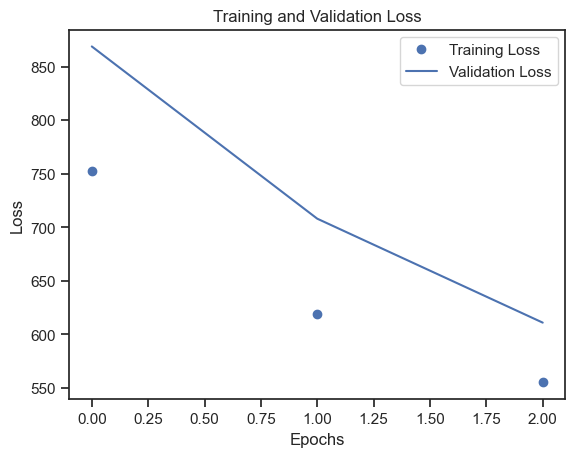

In [37]:

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(history.epoch, training_loss, 'bo', label='Training Loss')  
plt.plot(history.epoch, validation_loss, 'b', label='Validation Loss')  

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

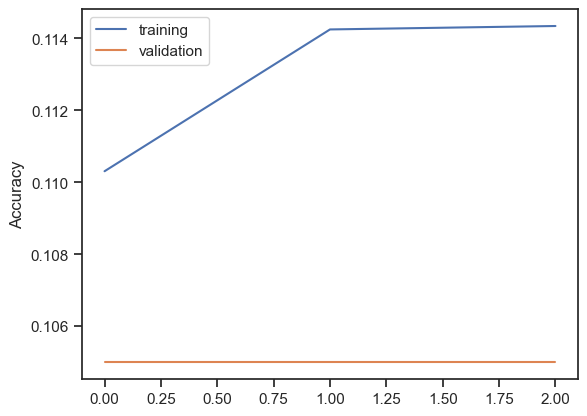

In [38]:

plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.legend()

<h1>Testing the model</h1>

In [25]:
image_path = r"C:\Users\tisha\Documents\GitHub\adv_python_project\test.jpg"
img = cv2.imread(image_path)  # Read as RGB
img = cv2.resize(img, (200, 200))  # Resize to match the model's expected sizing
img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

# Expand dimensions to (1, 64, 64, 3) for single image
img = np.expand_dims(img, axis=0)

# Check the shape to ensure it matches the model's input shape
print('Image shape:', img.shape)

Image shape: (1, 64, 64, 3)


In [26]:
predicted_age = model.predict(img)

# Print the predicted age
print('Predicted age:', predicted_age[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted age: 30.174225
